# Topic 1 Overview of Machine Learning and Tensorflow

In [0]:
!pip install tensorflow-gpu==2.0.0 --upgrade

In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

tf.test.gpu_device_name()

Version:  2.0.0
Eager mode:  True


'/device:GPU:0'

# Topic 2 Basic Tensorflow Operations

## Tensor and Constant

In [0]:
a = tf.constant(4,dtype=tf.float32)
b = tf.constant(5.6,dtype=tf.float32)
c = a*b
c

<tf.Tensor: id=5, shape=(), dtype=float32, numpy=22.4>

In [0]:
c.numpy()

22.4

In [0]:
a = tf.constant(4)
b = tf.constant(5.6)
# a*b

In [0]:
a = tf.constant([1,5])
a.numpy()

array([1, 5], dtype=int32)

## Variable

In [0]:
a = tf.Variable(0.0)

In [0]:
a.numpy()

0.0

In [0]:
# Method 1
a.assign_add(2)
a.numpy()

3.0

In [0]:
a.assign_sub(1)
a.numpy()

2.0

In [0]:
# Method 2
a.assign( a * 2)
a.numpy()

4.0

In [0]:
# Method 3
a = a+1
a.numpy()

5.0

In [0]:
a = tf.Variable(tf.zeros((2,2)))
a.numpy()

array([[0., 0.],
       [0., 0.]], dtype=float32)

## Gradient

In [0]:
def f(x):
  return x**3

In [0]:
f(2)

8

In [0]:
x = tf.Variable(2.0)
with tf.GradientTape() as g:
  y = f(x)
dy_dx = g.gradient(y,x)
dy_dx.numpy()  #3*x^2

12.0

In [0]:
x = tf.constant(2.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = f(x)
dy_dx = g.gradient(y,x)
dy_dx.numpy()  #3*x^2

12.0

## Matrix

In [0]:
a = tf.constant([[1,2],[3,4]])
b = tf.constant([[5,6],[7,8]])
c = tf.matmul(a,b)
c

<tf.Tensor: id=366, shape=(2, 2), dtype=int32, numpy=
array([[19, 22],
       [43, 50]], dtype=int32)>

## Exercise: Matrix

In [0]:
x = tf.constant([[1,2]],dtype=tf.float32) # 1*2
w = tf.constant([[1,2],[3,4]],dtype=tf.float32) # 2*2
b = tf.constant([[3,5]],dtype=tf.float32) #1*2
y = tf.matmul(x,w)+b
y

<tf.Tensor: id=149, shape=(1, 2), dtype=float32, numpy=array([[10., 15.]], dtype=float32)>

In [0]:
tf.matmul(x,w) # matrix multiplication

<tf.Tensor: id=151, shape=(1, 2), dtype=float32, numpy=array([[ 7., 10.]], dtype=float32)>

In [0]:
x*w # element-wise multiplication (dot product)

<tf.Tensor: id=152, shape=(2, 2), dtype=float32, numpy=
array([[1., 4.],
       [3., 8.]], dtype=float32)>

In [0]:
tf.multiply(x, w) # element-wise multiplication

<tf.Tensor: id=153, shape=(2, 2), dtype=float32, numpy=
array([[1., 4.],
       [3., 8.]], dtype=float32)>

## Graph Mode

In [0]:
W = tf.Variable(tf.ones((2,2)),dtype=tf.float32)
b = tf.Variable(tf.zeros((1,2)),dtype=tf.float32)

@tf.function
def nn(x):
  y = tf.matmul(x,W)+b
  return tf.nn.relu(y)

x = tf.constant([[1,0]],dtype=tf.float32)
y = nn(x)
y

<tf.Tensor: id=256, shape=(1, 2), dtype=float32, numpy=array([[1., 1.]], dtype=float32)>

In [0]:
@tf.function
def f(x):
  return x*x*x

x = tf.Variable(2.0)

with tf.GradientTape() as g:  
 y = f(x)
 
dy_dx = g.gradient(y,x)
dy_dx

<tf.Tensor: id=334, shape=(), dtype=float32, numpy=12.0>

In [0]:
a = tf.constant([1,2,3,4])

In [0]:
tf.argmax(a)

<tf.Tensor: id=353, shape=(), dtype=int64, numpy=3>

In [0]:
tf.reduce_sum(a)

<tf.Tensor: id=358, shape=(), dtype=int32, numpy=10>

In [0]:
tf.reduce_mean(a)

<tf.Tensor: id=360, shape=(), dtype=int32, numpy=2>

In [0]:
a = tf.random.normal([2,3])
a

<tf.Tensor: id=378, shape=(2, 3), dtype=float32, numpy=
array([[-1.4246248 ,  0.02565097, -0.22373931],
       [ 0.9777216 ,  0.63972527,  2.1979625 ]], dtype=float32)>

In [0]:
a = tf.random.uniform([2,3])
a

<tf.Tensor: id=385, shape=(2, 3), dtype=float32, numpy=
array([[0.05837739, 0.714713  , 0.64648116],
       [0.6283643 , 0.66727126, 0.4701059 ]], dtype=float32)>

# Topic 3 Datasets

## MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
# x_train[0]

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

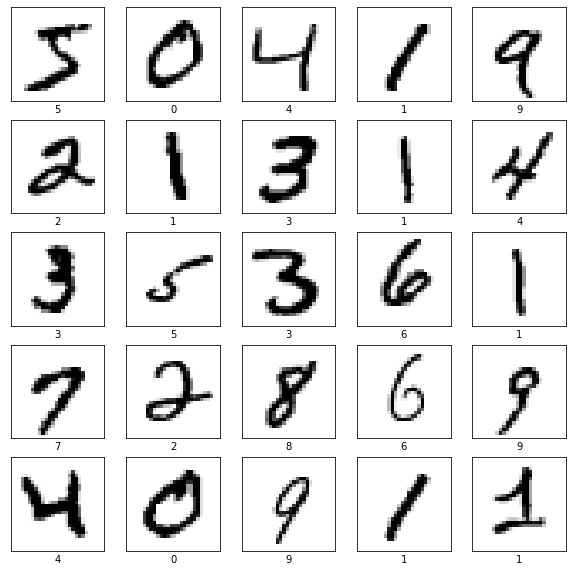

In [0]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

#### One Hot Encoding

In [0]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

Using TensorFlow backend.


In [0]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
y_train.shape

(60000, 10)

## Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

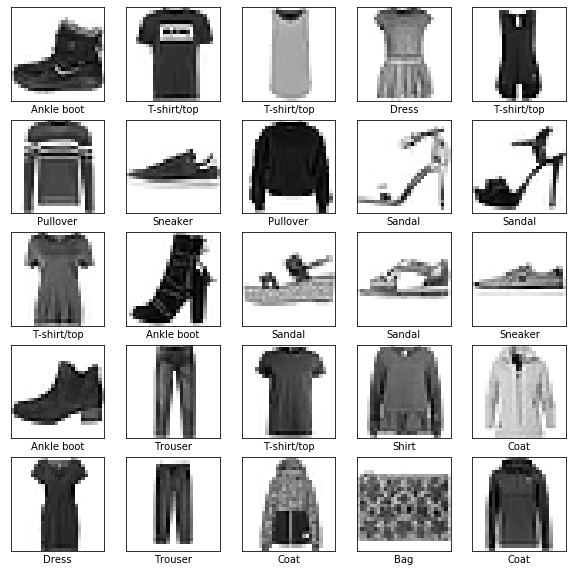

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## CIFAR dataset

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

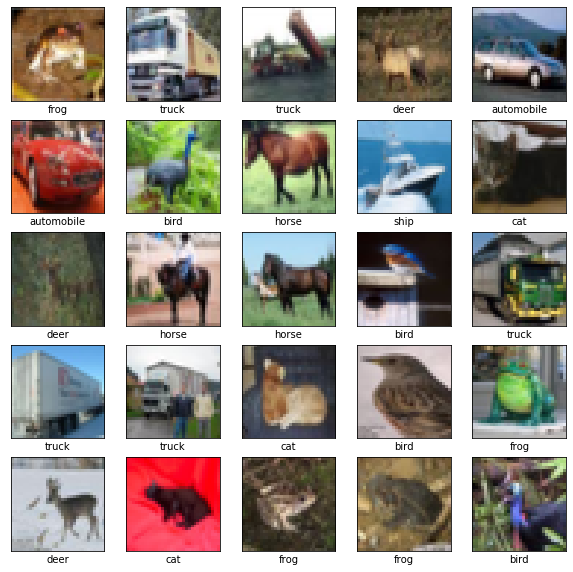

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

## IMDB Dataset

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32

# Loading data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [0]:
len(x_train), len(x_test)

(25000, 25000)

# Topic 4 Neural Networks for Regression

### Prepare the data

In [0]:
import pandas as pd
dataset_path = "BostonHousing.csv"                     
dataset = pd.read_csv(dataset_path)
dataset

crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0    0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273     21.0  396.90   7.88  11.9

[506 rows x 14 columns]

In [0]:
# Check missing data
dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [0]:
# Split the data to train and test dataset
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
x_train.head()

crim   zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
329   0.06724  0.0   3.24     0  0.460  ...  430     16.9  375.21   7.34  22.6
371   9.23230  0.0  18.10     0  0.631  ...  666     20.2  366.15   9.53  50.0
219   0.11425  0.0  13.89     1  0.550  ...  276     16.4  393.74  10.50  23.0
403  24.80170  0.0  18.10     0  0.693  ...  666     20.2  396.90  19.77   8.3
78    0.05646  0.0  12.83     0  0.437  ...  398     18.7  386.40  12.34  21.2

[5 rows x 14 columns]

In [0]:
x_test.head()

crim    zn  indus  chas    nox  ...  tax  ptratio       b  lstat  medv
0   0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
9   0.17004  12.5   7.87     0  0.524  ...  311     15.2  386.71  17.10  18.9
11  0.11747  12.5   7.87     0  0.524  ...  311     15.2  396.90  13.27  18.9
23  0.98843   0.0   8.14     0  0.538  ...  307     21.0  394.54  19.88  14.5
25  0.84054   0.0   8.14     0  0.538  ...  307     21.0  303.42  16.51  13.9

[5 rows x 14 columns]

In [0]:
# Create input and output
y_train = x_train.pop('medv')
y_test = x_test.pop('medv')

In [0]:
# Normalize the data
# x_train = (x_train - x_train.mean())/x_train.std()
# x_test = (x_test - x_test.mean())/x_test.std()

# OR
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
x_train.describe()

crim            zn  ...             b         lstat
count  3.540000e+02  3.540000e+02  ...  3.540000e+02  3.540000e+02
mean   3.042137e-17 -1.685720e-16  ... -5.083818e-16 -1.815873e-16
std    1.001415e+00  1.001415e+00  ...  1.001415e+00  1.001415e+00
min   -3.996004e-01 -4.809143e-01  ... -3.661242e+00 -1.552574e+00
25%   -3.917645e-01 -4.809143e-01  ...  2.209776e-01 -7.512532e-01
50%   -3.713803e-01 -4.809143e-01  ...  3.997153e-01 -2.038445e-01
75%   -7.337232e-02  6.167768e-02  ...  4.549287e-01  5.735829e-01
max    9.059771e+00  3.642785e+00  ...  4.619873e-01  3.616961e+00

[8 rows x 13 columns]

### Build the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
x_train.shape[1]

13

In [0]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[x_train.shape[1]]))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [0]:
optimizer = tf.keras.optimizers.RMSprop(lr=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = Sequential([
    Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])

In [0]:
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Visualize the Model

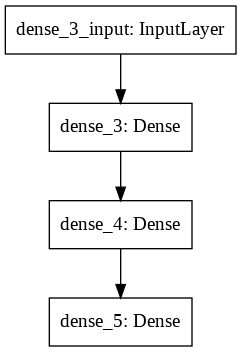

In [0]:
keras.utils.plot_model(model, 'my_first_model.png')

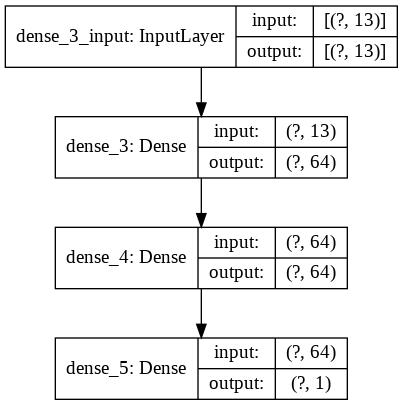

In [0]:
keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Train the model

In [0]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS, batch_size = 23, shuffle=True, validation_data=(x_test,y_test))

Train on 354 samples, validate on 152 samples
Epoch 1/100
354/354 [==============================] - 1s 2ms/sample - loss: 539.8148 - mae: 21.4514 - mse: 539.8148 - val_loss: 531.4182 - val_mae: 20.8027 - val_mse: 531.4182
Epoch 2/100
354/354 [==============================] - 0s 169us/sample - loss: 446.4708 - mae: 19.1304 - mse: 446.4708 - val_loss: 423.1490 - val_mae: 18.1783 - val_mse: 423.1490
Epoch 3/100
354/354 [==============================] - 0s 150us/sample - loss: 340.7395 - mae: 16.3517 - mse: 340.7395 - val_loss: 302.4792 - val_mae: 14.9671 - val_mse: 302.4792
Epoch 4/100
354/354 [==============================] - 0s 163us/sample - loss: 229.5864 - mae: 13.0416 - mse: 229.5864 - val_loss: 179.4582 - val_mae: 11.1251 - val_mse: 179.4582
Epoch 5/100
354/354 [==============================] - 0s 146us/sample - loss: 131.9334 - mae: 9.4952 - mse: 131.9334 - val_loss: 95.4682 - val_mae: 7.4758 - val_mse: 95.4682
Epoch 6/100
354/354 [==============================] - 0s 155us/s

### Evaluate the model

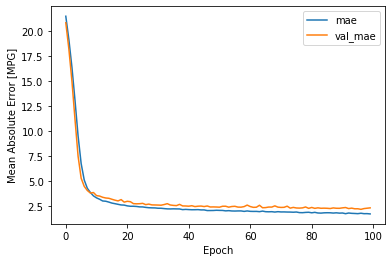

In [0]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
loss, mae, mse

152/152 - 0s - loss: 10.8454 - mae: 2.3218 - mse: 10.8454


(10.845427362542404, 2.3217716, 10.8454275)

### Make Prediction

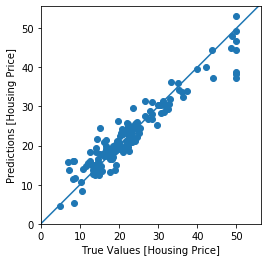

In [0]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Housing Price]')
plt.ylabel('Predictions [Housing Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])


### Save the Model in HDF5 Format

In [0]:
model.save("regression.h5")

### Load the Model

In [0]:
new_model = keras.models.load_model('regression.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
loss, mae, mse

152/152 - 0s - loss: 10.8454 - mae: 2.3218 - mse: 10.8454


(10.845427362542404, 2.3217716, 10.8454275)

### Save the Model in SavedModel Format

In [0]:
model.save("regression/1/")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: regression/1/assets


In [0]:
new_model = keras.models.load_model('regression/1/')
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Save and Load Weighta

In [0]:
# Save the weights
model.save_weights('./regression/1/w')

In [0]:
model = Sequential([
    Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
# Restore the weights
model.load_weights('./regression/1/w')

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
loss, mae, mse

152/152 - 0s - loss: 10.8454 - mae: 2.3218 - mse: 10.8454


(10.845427362542404, 2.3217716, 10.8454275)

### Exercise: Predictive Regression Model

In [0]:
import pandas as pd
dataset_path = "iris.csv"
                     
dataset = pd.read_csv(dataset_path)
dataset

SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]

In [0]:
dataset = dataset.dropna()
dataset.pop('Name')
dataset

SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]

In [0]:
x_train = dataset.sample(frac=0.7,random_state=0)
x_test = dataset.drop(x_train.index)

In [0]:
y_train = x_train.pop('SepalWidth')
y_test = x_test.pop('SepalWidth')

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[x_train.columns] = sc.fit_transform(x_train)
x_test[x_train.columns] = sc.transform(x_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=[x_train.shape[1]]))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

In [0]:
optimizer = tf.keras.optimizers.RMSprop()
model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


In [0]:
EPOCHS = 100
history = model.fit(x_train, y_train,epochs=EPOCHS,shuffle=True, validation_data=(x_test,y_test))

Train on 105 samples, validate on 45 samples
Epoch 1/100
105/105 [==============================] - 0s 2ms/sample - loss: 9.0052 - mae: 2.9692 - mse: 9.0052 - val_loss: 8.6210 - val_mae: 2.9076 - val_mse: 8.6210
Epoch 2/100
105/105 [==============================] - 0s 234us/sample - loss: 8.0550 - mae: 2.8067 - mse: 8.0550 - val_loss: 7.7772 - val_mae: 2.7595 - val_mse: 7.7772
Epoch 3/100
105/105 [==============================] - 0s 252us/sample - loss: 7.2595 - mae: 2.6631 - mse: 7.2595 - val_loss: 6.9273 - val_mae: 2.6004 - val_mse: 6.9273
Epoch 4/100
105/105 [==============================] - 0s 255us/sample - loss: 6.4247 - mae: 2.5009 - mse: 6.4247 - val_loss: 5.9206 - val_mae: 2.3995 - val_mse: 5.9206
Epoch 5/100
105/105 [==============================] - 0s 249us/sample - loss: 5.4542 - mae: 2.2989 - mse: 5.4542 - val_loss: 4.8269 - val_mae: 2.1579 - val_mse: 4.8269
Epoch 6/100
105/105 [==============================] - 0s 236us/sample - loss: 4.4038 - mae: 2.0566 - mse: 4.403

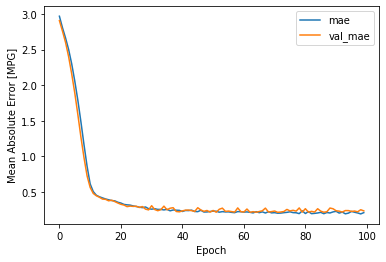

In [0]:
mae = history.history['mae']
val_mae = history.history['val_mae']
epoch = range(len(mae))

import matplotlib.pyplot as plt

plt.plot(epoch,mae,label='mae')
plt.plot(epoch,val_mae,label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [MPG]')
plt.legend()
plt.show()

In [0]:
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
loss, mae, mse

45/45 - 0s - loss: 0.0944 - mae: 0.2337 - mse: 0.0944
Testing Mean Abs Error:  0.23


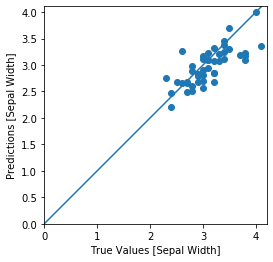

In [0]:
y_hat = model.predict(x_test).flatten()

plt.scatter(y_test, y_hat)
plt.xlabel('True Values [Sepal Width]')
plt.ylabel('Predictions [Sepal Width]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([0, 100], [0, 100])


In [0]:
model.save("iris.h5")

# tf.saved_model.save(model, "/model_iris/1/")

In [0]:
new_model = keras.models.load_model('iris.h5')

In [0]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                256       
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 33        
Total params: 3,425
Trainable params: 3,425
Non-trainable params: 0
_________________________________________________________________


# Topic 5 Neural Network for Classification

## NN Demo on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
from math import log
- (1*log(0.7) + 0*log(0.2) + 0*log(0.1))

0.35667494393873245

In [0]:
- (0*log(0.8) + 1*log(0.1) + 0*log(0.1))

2.3025850929940455

In [0]:
- (0*log(0.1) + 1*log(0.8) + 0*log(0.1))

0.2231435513142097

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2921 - accuracy: 0.9155 - val_loss: 0.1687 - val_accuracy: 0.9500
Epoch 2/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.1332 - accuracy: 0.9604 - val_loss: 0.1111 - val_accuracy: 0.9664
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0992 - accuracy: 0.9704 - val_loss: 0.0974 - val_accuracy: 0.9701
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0771 - accuracy: 0.9762 - val_loss: 0.0974 - val_accuracy: 0.9702
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0662 - accuracy: 0.9798 - val_loss: 0.1038 - val_accuracy: 0.9685
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0931 - val_accuracy: 0.9713
Epoch 7/10
60000/60000 [==============================] 

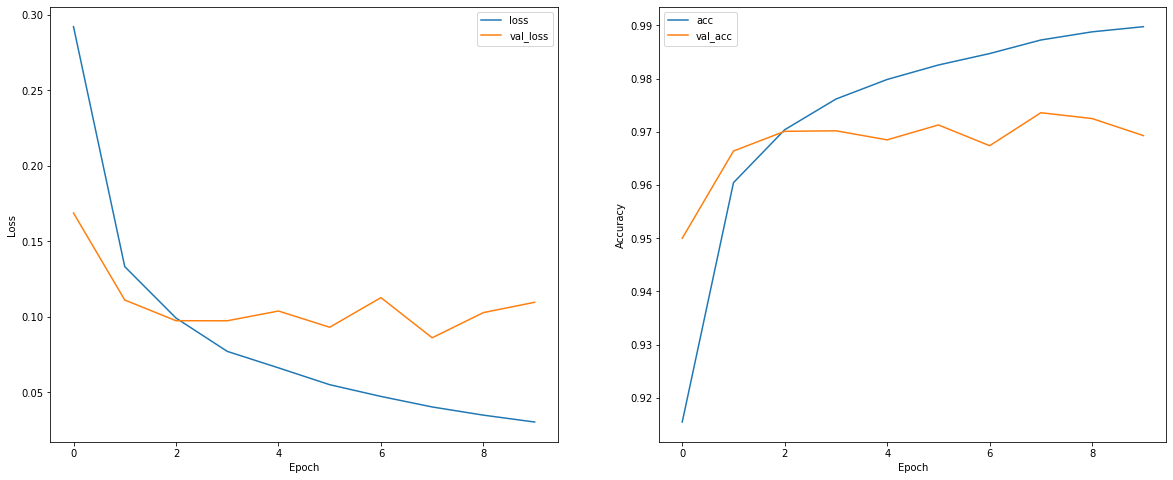

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.0549 - accuracy: 0.9693


(0.10961925676031388, 0.9693)

In [0]:
model.save("mnist.h5")

# tf.saved_model.save(model, "/model_mnist/1/")

In [0]:
new_model =keras.models.load_model('mnist.h5')

In [0]:
new_model.summary()

#### Sparse Cross Entropy vs Cross Entropy

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from keras.utils import to_categorical
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

Using TensorFlow backend.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3103 - accuracy: 0.9085 - val_loss: 0.1645 - val_accuracy: 0.9486
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1380 - accuracy: 0.9581 - val_loss: 0.1253 - val_accuracy: 0.9603
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.1012 - accuracy: 0.9693 - val_loss: 0.1056 - val_accuracy: 0.9655
Epoch 4/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0803 - accuracy: 0.9751 - val_loss: 0.1009 - val_accuracy: 0.9696
Epoch 5/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0658 - accuracy: 0.9796 - val_loss: 0.0983 - val_accuracy: 0.9699
Epoch 6/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0938 - val_accuracy: 0.9728
Epoch 7/10
60000/60000 [==============================] 

## Ex: Classification for Fashsion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5055 - accuracy: 0.8194 - val_loss: 0.4320 - val_accuracy: 0.8423
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3707 - accuracy: 0.8650 - val_loss: 0.3851 - val_accuracy: 0.8594
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3370 - accuracy: 0.8761 - val_loss: 0.3618 - val_accuracy: 0.8651
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3103 - accuracy: 0.8855 - val_loss: 0.3537 - val_accuracy: 0.8742
Epoch 5/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2943 - accuracy: 0.8907 - val_loss: 0.3714 - val_accuracy: 0.8635
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2808 - accuracy: 0.8958 - val_loss: 0.3437 - val_accuracy: 0.8777
Epoch 7/10
60000/60000 [==============================] 

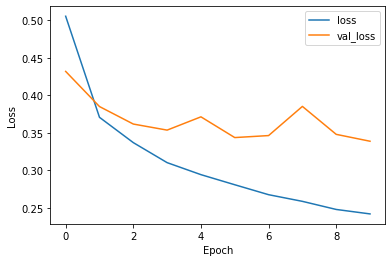

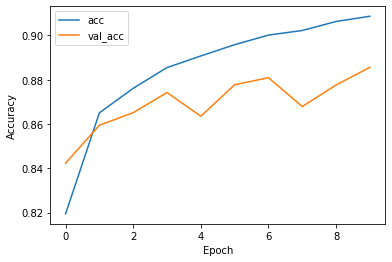

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure()
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.2701 - accuracy: 0.8856
Accuracy: 88.56%


In [0]:
# model.save("classifcation_model_fashion_mnist.h5")

tf.saved_model.save(model, "/model_fashion_mnist/1/")

INFO:tensorflow:Assets written to: /model_fashion_mnist/1/assets


# Topic 6 Convolutional Neural Network (CNN)

## CNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [0]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.1633 - accuracy: 0.9510 - val_loss: 0.0595 - val_accuracy: 0.9792
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0402 - val_accuracy: 0.9878
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0343 - val_accuracy: 0.9886
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0341 - val_accuracy: 0.9889
Epoch 6/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0159 - accuracy: 0.9949 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 7/10
60000/60000 [==============================

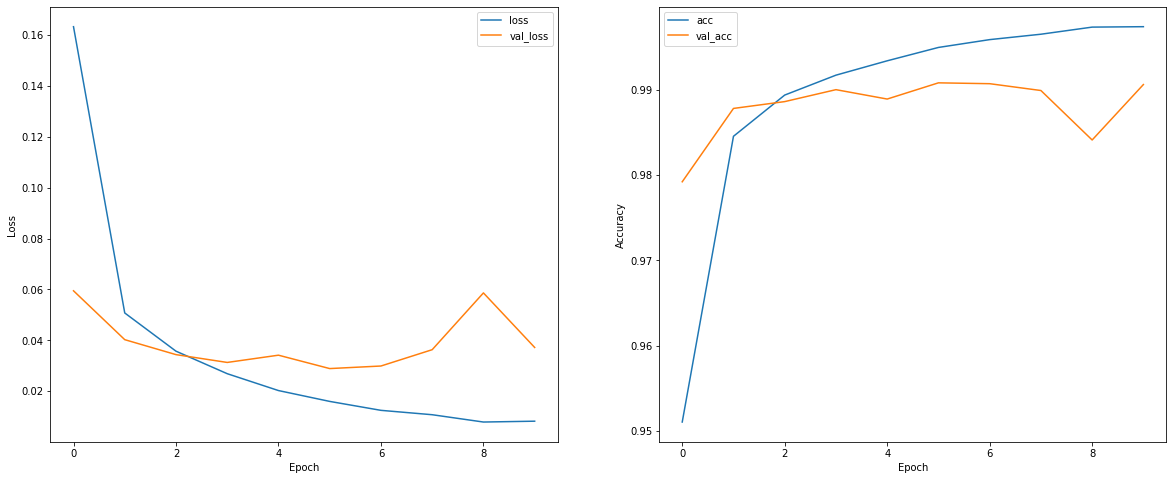

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
loss,acc

10000/1 - 1s - loss: 0.0186 - accuracy: 0.9906


(0.037165252534523595, 0.9906)

## Ex: CNN on CIFAR dataset

### Import and Normalize data

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
train_images.shape

### Build the Model

In [0]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               524416    
_________________________________________________________________
dense_25 (Dense)             (None, 10)               

### Train the Model

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 141us/sample - loss: 1.3802 - accuracy: 0.5072 - val_loss: 1.0674 - val_accuracy: 0.6243
Epoch 2/10
50000/50000 [==============================] - 6s 128us/sample - loss: 1.0019 - accuracy: 0.6486 - val_loss: 0.9611 - val_accuracy: 0.6617
Epoch 3/10
50000/50000 [==============================] - 7s 131us/sample - loss: 0.8674 - accuracy: 0.6971 - val_loss: 0.9169 - val_accuracy: 0.6817
Epoch 4/10
50000/50000 [==============================] - 6s 130us/sample - loss: 0.7640 - accuracy: 0.7324 - val_loss: 0.8823 - val_accuracy: 0.6983
Epoch 5/10
50000/50000 [==============================] - 7s 134us/sample - loss: 0.6712 - accuracy: 0.7658 - val_loss: 0.8787 - val_accuracy: 0.7039
Epoch 6/10
50000/50000 [==============================] - 7s 132us/sample - loss: 0.5927 - accuracy: 0.7922 - val_loss: 0.8603 - val_accuracy: 0.7155
Epoch 7/10
50000/50000 [==========================

### Evaluate the Model

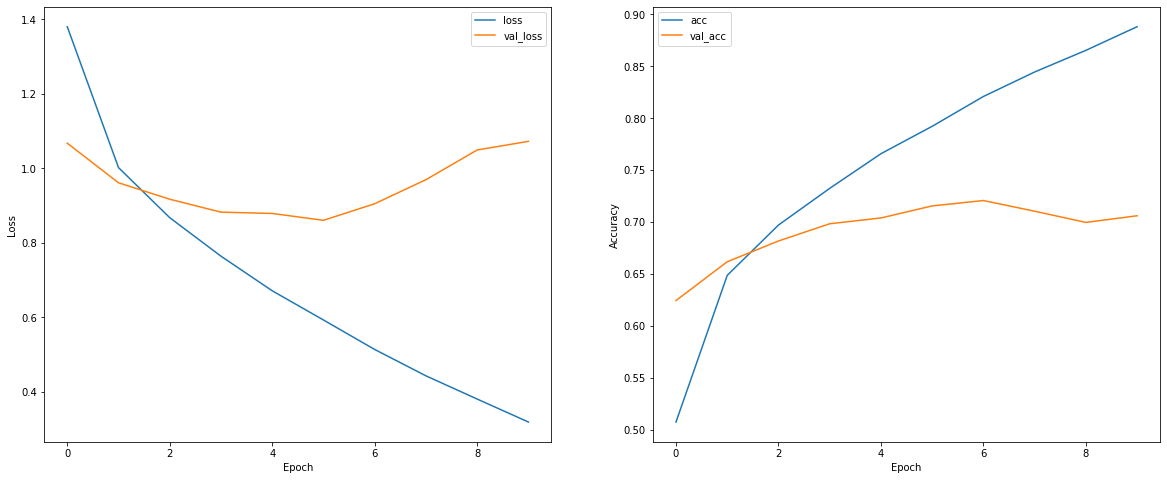

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

10000/1 - 1s - loss: 1.3651 - accuracy: 0.7060
Accuracy: 70.60%


## CNN on Small Dataset: Cats and Dogs

### Import the data

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [29]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [30]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


### Image Generator

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
validation_image_generator = ImageDataGenerator(rescale=1./255) 


In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualize the raw images 

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

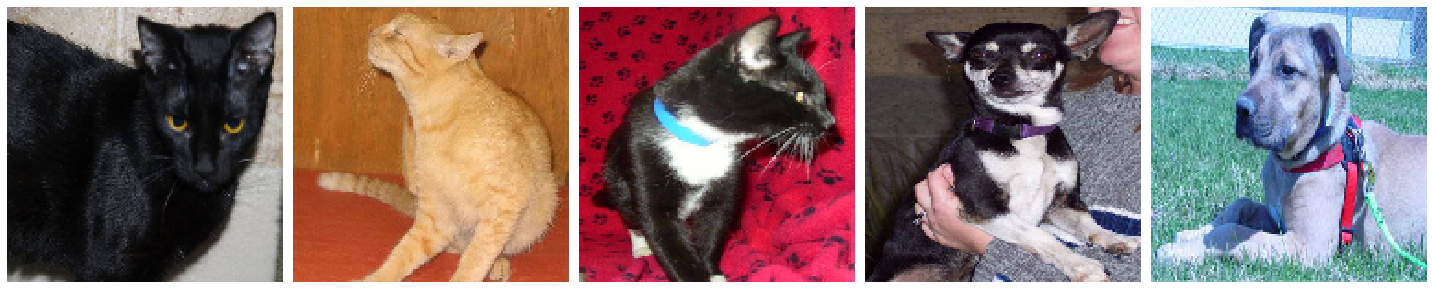

In [0]:
plotImages(sample_training_images[:5])

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape = (IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])



### Train the Model

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 8s 534ms/step - loss: 0.9893 - accuracy: 0.4995 - val_loss: 0.6930 - val_accuracy: 0.4955
Epoch 2/15
15/15 [==============================] - 8s 501ms/step - loss: 0.6912 - accuracy: 0.5358 - val_loss: 0.6887 - val_accuracy: 0.5056
Epoch 3/15
15/15 [==============================] - 7s 492ms/step - loss: 0.6756 - accuracy: 0.5988 - val_loss: 0.6720 - val_accuracy: 0.5938
Epoch 4/15
15/15 [==============================] - 7s 490ms/step - loss: 0.6379 - accuracy: 0.6464 - val_loss: 0.6626 - val_accuracy: 0.6027
Epoch 5/15
15/15 [==============================] - 7s 486ms/step - loss: 0.6051 - accuracy: 0.6987 - val_loss: 0.6218 - val_accuracy: 0.6674
Epoch 6/15
15/15 [==============================] - 7s 488ms/step - loss: 0.5538 - accuracy: 0.7115 - val_loss: 0.6369 - val_accuracy: 0.6518
Epoch 7/15
15/15 [==============================] - 7s 480ms/step - loss: 0.4880 - accuracy: 0.7741 - val_loss: 0.6155 - val_accuracy: 0.6819
Epoch 

### Evaluate the Model

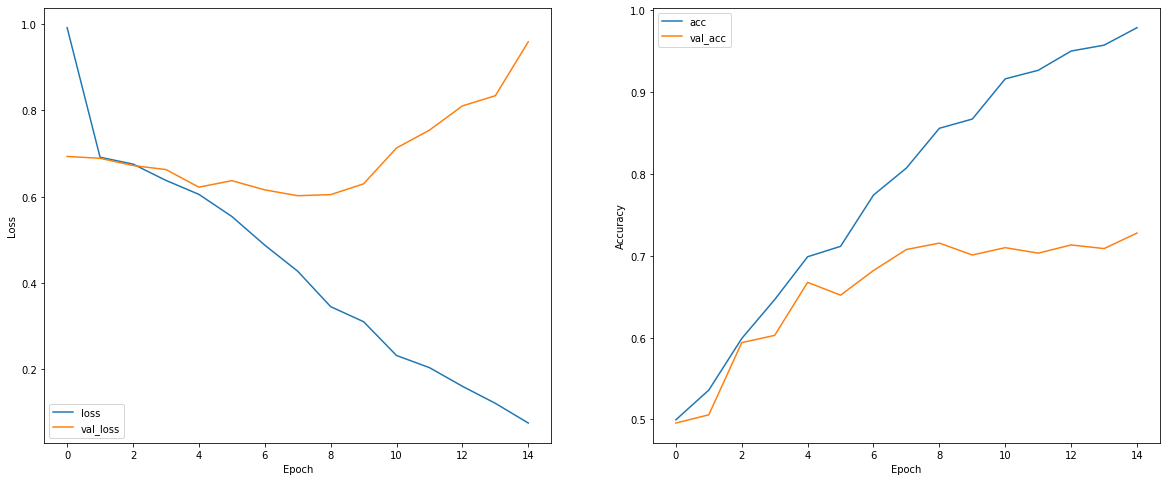

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Data Augmentation

#### Flipping

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


In [0]:
train_data_gen[0][0].shape

(128, 150, 150, 3)

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

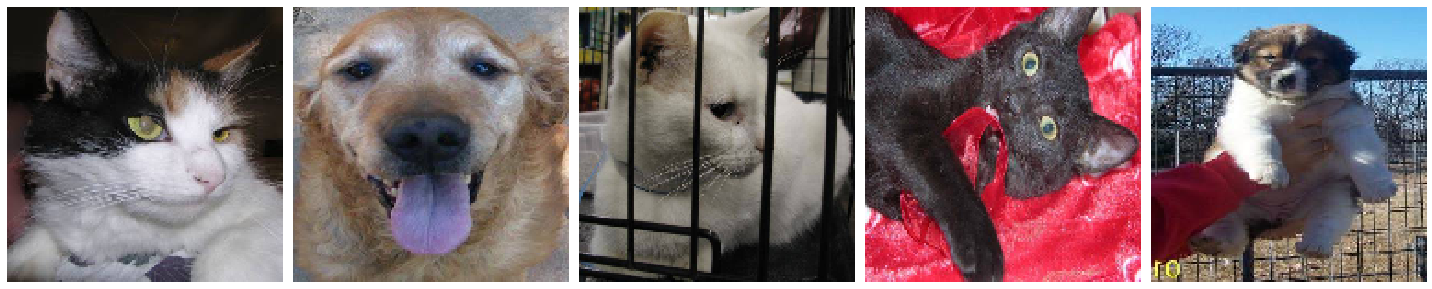

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

#### Rotation

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


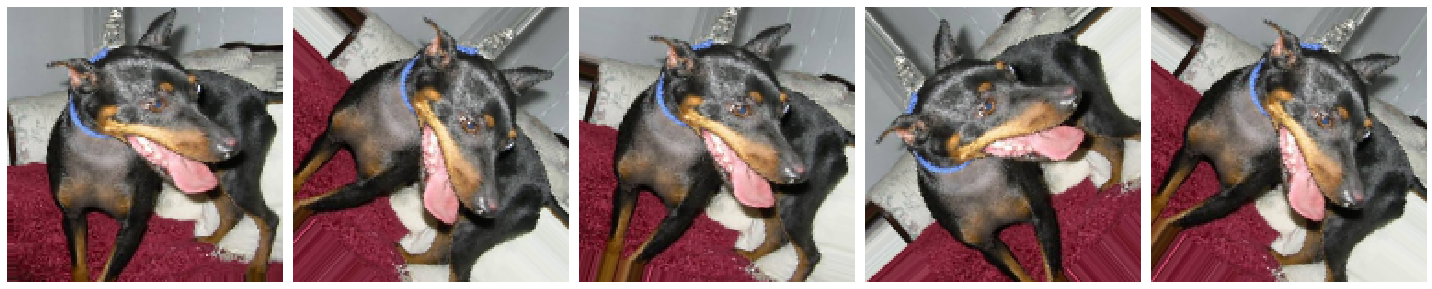

In [0]:
plotImages(augmented_images)

#### Zoom

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 2 classes.


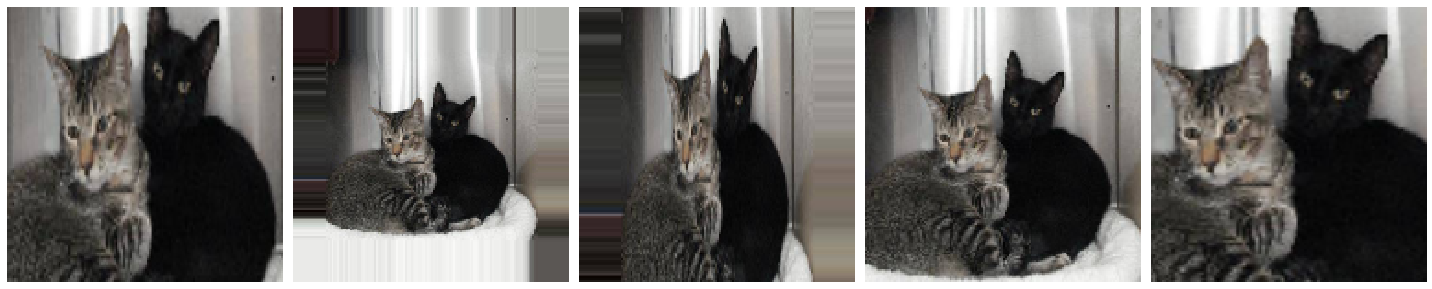

In [0]:
plotImages(augmented_images)

### Applying Data Augumentation

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


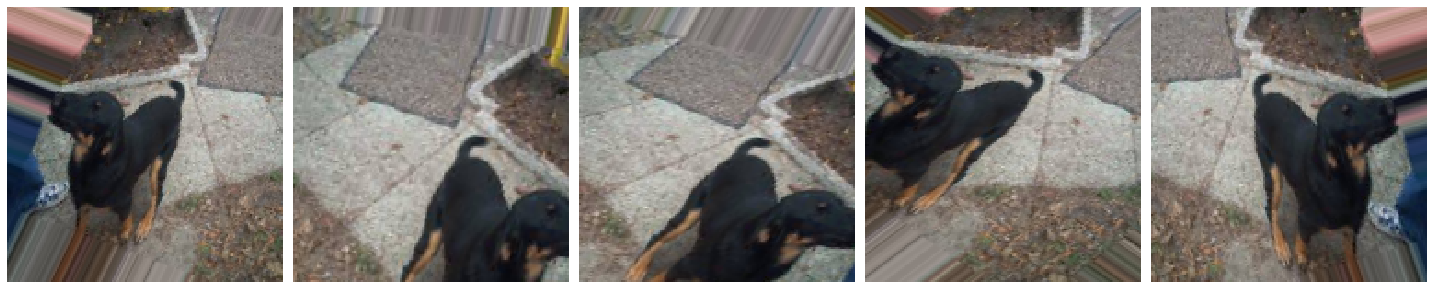

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


### Build the Model

In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu',  input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.5),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [0]:
model_new.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 64)      

### Train the Model

In [0]:
model_new.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size
)

Epoch 1/15
15/15 [==============================] - 15s 991ms/step - loss: 1.1619 - accuracy: 0.5075 - val_loss: 0.6926 - val_accuracy: 0.5056
Epoch 2/15
15/15 [==============================] - 15s 975ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 14s 952ms/step - loss: 0.6931 - accuracy: 0.4989 - val_loss: 0.6930 - val_accuracy: 0.5223
Epoch 4/15
15/15 [==============================] - 14s 926ms/step - loss: 0.6932 - accuracy: 0.5198 - val_loss: 0.6924 - val_accuracy: 0.5737
Epoch 5/15
15/15 [==============================] - 13s 892ms/step - loss: 0.6931 - accuracy: 0.5278 - val_loss: 0.6920 - val_accuracy: 0.4955
Epoch 6/15
15/15 [==============================] - 14s 911ms/step - loss: 0.6893 - accuracy: 0.5475 - val_loss: 0.6954 - val_accuracy: 0.5033
Epoch 7/15
15/15 [==============================] - 13s 895ms/step - loss: 0.6880 - accuracy: 0.5422 - val_loss: 0.7059 - val_accuracy: 0.4989

### Evalaute the Model

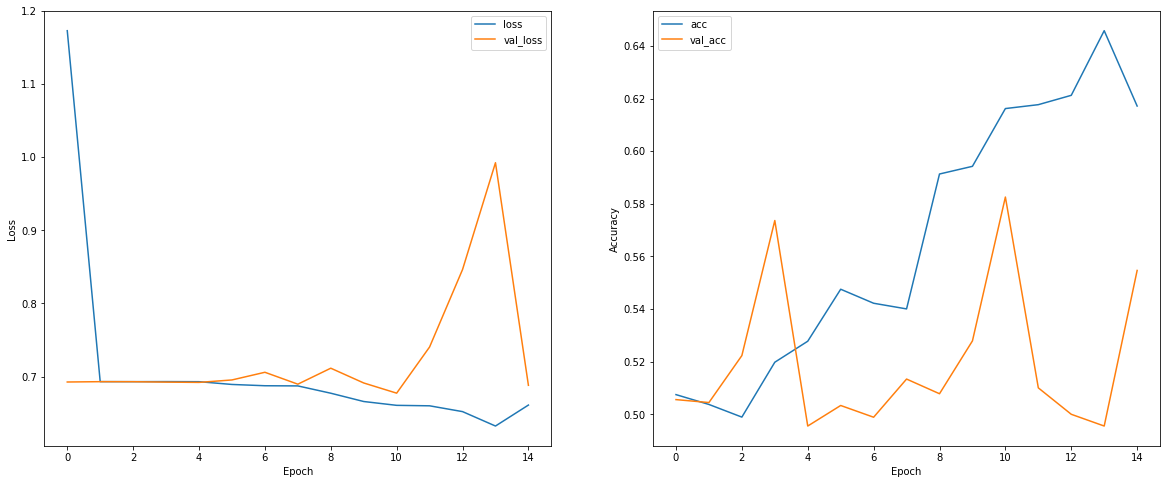

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Ex: CNN with Dropout

In [0]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 151us/sample - loss: 1.5479 - accuracy: 0.4399 - val_loss: 1.2987 - val_accuracy: 0.5397
Epoch 2/10
50000/50000 [==============================] - 7s 134us/sample - loss: 1.2479 - accuracy: 0.5535 - val_loss: 1.1148 - val_accuracy: 0.6194
Epoch 3/10
50000/50000 [==============================] - 7s 133us/sample - loss: 1.1284 - accuracy: 0.5998 - val_loss: 1.0368 - val_accuracy: 0.6411
Epoch 4/10
50000/50000 [==============================] - 7s 134us/sample - loss: 1.0574 - accuracy: 0.6262 - val_loss: 0.9987 - val_accuracy: 0.6495
Epoch 5/10
50000/50000 [==============================] - 7s 136us/sample - loss: 1.0064 - accuracy: 0.6424 - val_loss: 0.9547 - val_accuracy: 0.6714
Epoch 6/10
50000/50000 [==============================] - 7s 138us/sample - loss: 0.9687 - accuracy: 0.6561 - val_loss: 0.9203 - val_accuracy: 0.6836
Epoch 7/10
50000/50000 [==========================

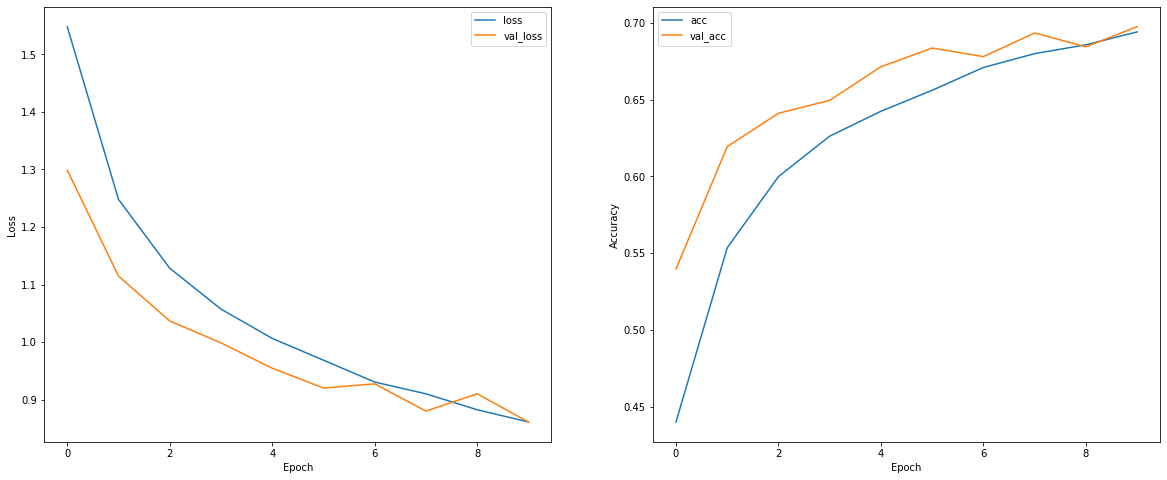

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Topic 7 Recurrent Neural Network (RNN)

## Text Classifcaiton With RNN

### Load the IMDB dataset

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 20000
maxlen = 80
batch_size = 32


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

### Build the Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow. keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

### Train the Model

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=15,validation_data=(x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 128s 5ms/sample - loss: 0.4568 - accuracy: 0.7864 - val_loss: 0.3778 - val_accuracy: 0.8372
Epoch 2/15
25000/25000 [==============================] - 126s 5ms/sample - loss: 0.3019 - accuracy: 0.8778 - val_loss: 0.3781 - val_accuracy: 0.8404
Epoch 3/15
25000/25000 [==============================] - 127s 5ms/sample - loss: 0.2191 - accuracy: 0.9134 - val_loss: 0.4314 - val_accuracy: 0.8138
Epoch 4/15
25000/25000 [==============================] - 126s 5ms/sample - loss: 0.1591 - accuracy: 0.9415 - val_loss: 0.5084 - val_accuracy: 0.8266
Epoch 5/15
14912/25000 [================>.............] - ETA: 38s - loss: 0.1097 - accuracy: 0.9606

KeyboardInterrupt: ignored

### Evaluate the Model

In [0]:
score, acc = model.evaluate(x_test, y_test,batch_size=batch_size)
score, acc

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Ex: RNN on MNIST dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, activation='relu',input_shape=(28,28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
12704/60000 [=====>........................] - ETA: 49s - loss: 1.5224 - accuracy: 0.4778

KeyboardInterrupt: ignored

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Stack RNN Architecture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(32, activation='relu',input_shape=(28,28),return_sequences=True),
    LSTM(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Bidirectional RNN Architecuture

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential([
    Bidirectional(LSTM(32, activation='relu',input_shape=(28,28))),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Topic 8 Transfer Learning & Tensorflow Hub

## Model Demo

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [0]:
img = image.load_img('bird.png',target_size=(224,224))

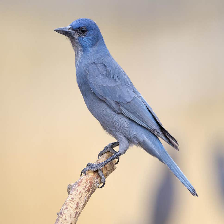

In [9]:
img

In [10]:
x = image.img_tpredictions = model.predict(x)o_array(img)

SyntaxError: ignored

In [11]:
x.shape

NameError: ignored

In [0]:
x = np.expand_dims(x,axis=0)

In [12]:
x.shape

NameError: ignored

In [0]:
model = VGG16()

In [0]:
model.summary()

In [0]:
predictions = model.predict(x)
predictions

In [0]:
classes = decode_predictions(predictions,top=3)
classes

## Fine Tuning

### Step 1: Data Augmentation

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [35]:
PATH

'/root/.keras/datasets/cats_and_dogs_filtered'

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [52]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
batch_size = 128
epochs = 25
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    ) 
image_gen_val = ImageDataGenerator(
    rescale = 1. / 255)

In [56]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [86]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

### Step 2: Pre-Trained Base Model

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow. keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [53]:
base_model=MobileNet(weights='imagenet',include_top=False) 

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
base_model.summary()

### Step 3: Add new layer

In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(1,activation='sigmoid')(x) 

model=Model(inputs=base_model.input,outputs=preds)

In [45]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [0]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [57]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

### Step 4: Train model

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val//batch_size,
    callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)],
)

Epoch 1/15
15/15 [==============================] - 16s 1s/step - loss: 0.1557 - accuracy: 0.9460 - val_loss: 0.7201 - val_accuracy: 0.8080
Epoch 2/15
15/15 [==============================] - 16s 1s/step - loss: 0.1560 - accuracy: 0.9434 - val_loss: 3.2983 - val_accuracy: 0.6696
Epoch 3/15
15/15 [==============================] - 15s 1s/step - loss: 0.1100 - accuracy: 0.9642 - val_loss: 0.8935 - val_accuracy: 0.8873


#### Test the Dog Image

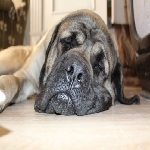

In [90]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((150,150))
img

In [91]:
img = np.array(img)/255.0
img.shape

(150, 150, 3)

In [92]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 150, 150, 3)

In [95]:
result = model.predict(img)
result

array([[1.]], dtype=float32)

In [96]:
round(result[0][0])

1.0

#### Test the Cat Image

65536/60717 [================================] - 0s 3us/step


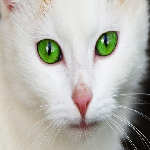

In [97]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image4.jpg','https://images.all-free-download.com/images/graphicthumb/cat_with_green_eyes_194623.jpg')
img = Image.open(img).resize((150,150))
img

In [0]:
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

In [99]:
result = model.predict(img)
round(result[0][0])

0.0

## Tenssorflow Hub

In [0]:
import tensorflow_hub as hub

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 

In [0]:
classifier = tf.keras.Sequential([hub.KerasLayer(classifier_url, input_shape=(224,224,3))])

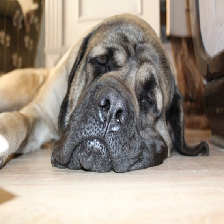

In [107]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://images.all-free-download.com/images/graphicthumb/dogs_dog_animal_215598.jpg')
img = Image.open(img).resize((224,224))
img

In [0]:
img = np.array(img)/255.0
img = np.expand_dims(img, axis=0)

In [110]:
result = classifier.predict(img)
result

array([[ 0.19942084, -0.50989014,  0.4426471 , ...,  0.77951974,
        -0.16284469,  0.7057946 ]], dtype=float32)

In [117]:
predicted_class = np.argmax(result[0])
predicted_class

244

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

Text(0.5, 1.0, 'Prediction: Bull Mastiff')

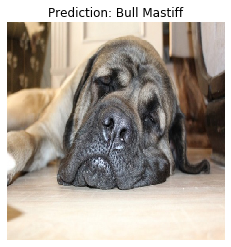

In [119]:
plt.imshow(img[0])
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
plt.title("Prediction: " + predicted_class_name.title())

# (Optional) Topic 9 Functional API

## Sequential Model as Function

### MNIST data

In [120]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
def nn_model():
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [122]:
model = nn_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


### Fashion MNIST data

In [123]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [124]:
model = nn_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [125]:
history = model.fit(x_train,y_train,epochs=10, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5091 - accuracy: 0.8178 - val_loss: 0.4220 - val_accuracy: 0.8489
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3724 - accuracy: 0.8644 - val_loss: 0.4195 - val_accuracy: 0.8495
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3366 - accuracy: 0.8766 - val_loss: 0.3754 - val_accuracy: 0.8614
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3135 - accuracy: 0.8853 - val_loss: 0.3444 - val_accuracy: 0.8755
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2987 - accuracy: 0.8895 - val_loss: 0.3561 - val_accuracy: 0.8724
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2857 - accuracy: 0.8944 - val_loss: 0.3410 - val_accuracy: 0.8773
Epoch 7/10
60000/60000 [==============================] 

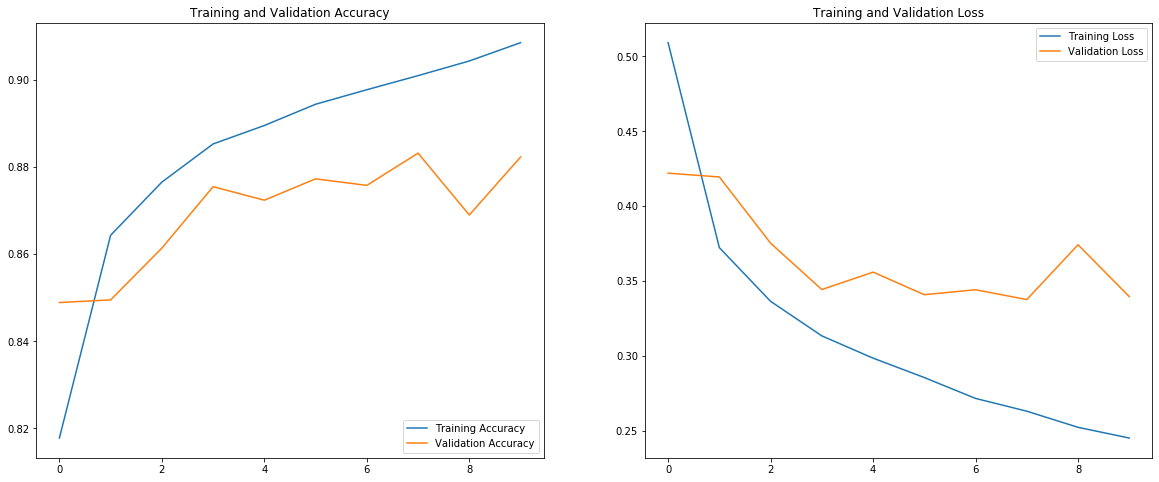

In [126]:
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Exercise

In [0]:
def nn_model(lr):
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [128]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

lr = [0.001,0.01,0.1]
acc=[]
for i in lr:
    model = nn_model(i)
    model.fit(x_train,y_train,verbose=0)
    loss,accuracy = model.evaluate(x_test,y_test)
    acc.append(accuracy)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

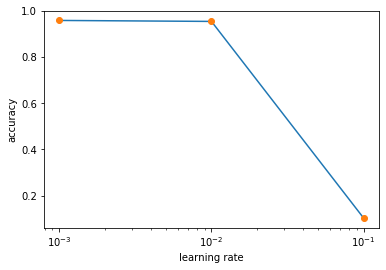

In [129]:
import matplotlib.pyplot as plt

plt.semilogx(lr,acc)
plt.semilogx(lr,acc,'o')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.show()

## Layers as Function

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

In [131]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [132]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.RMSprop(),metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=5,validation_data=(x_test,y_test))
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3362 - accuracy: 0.9050 - val_loss: 0.1846 - val_accuracy: 0.9435
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1584 - accuracy: 0.9538 - val_loss: 0.1418 - val_accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1169 - accuracy: 0.9653 - val_loss: 0.1191 - val_accuracy: 0.9635
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0940 - accuracy: 0.9720 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0797 - accuracy: 0.9769 - val_loss: 0.1020 - val_accuracy: 0.9713
10000/1 - 1s - loss: 0.0518 - accuracy: 0.9713
Test loss: 0.10203988611618989
Test accuracy: 0.9713


In [0]:
model.save('model.h5')
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model('model.h5')

###Ensembling with Nested Models

In [0]:
from tensorflow.keras import layers

def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

In [0]:
keras.utils.plot_model(ensemble_model, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)


### Autoencoder

In [0]:
from tensorflow.keras import layers 
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

In [0]:
keras.utils.plot_model(autoencoder, 'model.png')
# keras.utils.plot_model(model, 'model.png', show_shapes=True)

### Toy Resnet

In [0]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

In [0]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

In [0]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Accuracy: {:5.2f}%".format(100*acc))

### Multiple Inputs and Outputs

In [0]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(shape=(None,), name='title')  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body')  # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

In [0]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

## Ex: Funcational API

In [0]:
from tensorflow.keras import layers

inputs = keras.Input(shape=(32, 32, 3), name='img')

x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y1 = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(16,(3,3), activation='relu',padding='same')(inputs)
x = layers.Conv2D(32,(3,3), activation='relu',padding='same')(x)
x = layers.Conv2D(64,(3,3), activation='relu',padding='same')(x)
y2 = layers.MaxPooling2D((2,2))(x)

y3 = layers.concatenate([y1, y2])
y4 = layers.Flatten()(y3)
y5 = layers.Dense(128,activation='softmax')(y4)
outputs = layers.Dense(10,activation='softmax')(y5)

model = keras.Model(inputs, outputs, name='dual_cnn')

In [0]:
# keras.utils.plot_model(model, 'model.png')
keras.utils.plot_model(model, 'model.png', show_shapes=True)

# (Optional) Topic 10 TF.Data

### Python generator

In [0]:
def count(stop):
  i = 0
  while i<stop:
    yield i
    i += 1

In [92]:
for n in count(5):
  print(n)

0
1
2
3
4


In [0]:
it = count(5)

In [96]:
next(it)

2

### Basic Mechanics

In [51]:
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [45]:
for i in dataset:
  print(i)

tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [0]:
it = iter(dataset)

In [47]:
next(it)

<tf.Tensor: id=197, shape=(), dtype=int32, numpy=8>

In [0]:
mapped = dataset.map(lambda value: value + 2)

In [35]:
for i in mapped:
  print(i)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)


In [36]:
dataset.reduce(0, lambda state, value: state + value)

<tf.Tensor: id=157, shape=(), dtype=int32, numpy=22>

### Dataset structure

In [72]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))
dataset1

<TensorSliceDataset shapes: (10,), types: tf.float32>

In [0]:
it1 = iter(dataset1)

In [74]:
next(it1)

<tf.Tensor: id=320, shape=(10,), dtype=float32, numpy=
array([0.7425175 , 0.44699085, 0.25783074, 0.664232  , 0.2763667 ,
       0.19958127, 0.131302  , 0.8570808 , 0.9484348 , 0.644187  ],
      dtype=float32)>

In [82]:
dataset2 = tf.data.Dataset.from_tensor_slices(
   (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [0]:
it2 = iter(dataset2)

In [84]:
next(it2)

(<tf.Tensor: id=389, shape=(), dtype=float32, numpy=0.18927693>,
 <tf.Tensor: id=390, shape=(100,), dtype=int32, numpy=
 array([93, 16, 97,  9, 95, 97, 53, 23, 83, 12, 16, 82, 50, 60, 97, 68, 25,
        30,  9, 42, 45, 11, 71, 35, 58, 10, 19, 17, 46, 46,  9, 15, 82, 90,
         7, 57, 44, 52, 33, 49, 59, 95, 59, 54, 51, 66, 95, 13, 69, 29, 55,
        14, 19, 32, 88, 67, 74, 63, 19, 77, 19, 14, 66, 88, 65,  3, 98, 50,
        16, 67, 36,  6,  6, 42,  0, 91, 10, 76, 86, 53, 89, 24,  9, 76, 31,
        29, 99,  8, 11,  0, 87, 60, 11,  7, 14,  7, 55, 97, 57, 40],
       dtype=int32)>)

In [88]:
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.float32, (tf.float32, tf.int32))>

In [0]:
it3 = iter(dataset3)

In [90]:
next(it3)

(<tf.Tensor: id=406, shape=(10,), dtype=float32, numpy=
 array([0.7425175 , 0.44699085, 0.25783074, 0.664232  , 0.2763667 ,
        0.19958127, 0.131302  , 0.8570808 , 0.9484348 , 0.644187  ],
       dtype=float32)>,
 (<tf.Tensor: id=407, shape=(), dtype=float32, numpy=0.18927693>,
  <tf.Tensor: id=408, shape=(100,), dtype=int32, numpy=
  array([93, 16, 97,  9, 95, 97, 53, 23, 83, 12, 16, 82, 50, 60, 97, 68, 25,
         30,  9, 42, 45, 11, 71, 35, 58, 10, 19, 17, 46, 46,  9, 15, 82, 90,
          7, 57, 44, 52, 33, 49, 59, 95, 59, 54, 51, 66, 95, 13, 69, 29, 55,
         14, 19, 32, 88, 67, 74, 63, 19, 77, 19, 14, 66, 88, 65,  3, 98, 50,
         16, 67, 36,  6,  6, 42,  0, 91, 10, 76, 86, 53, 89, 24,  9, 76, 31,
         29, 99,  8, 11,  0, 87, 60, 11,  7, 14,  7, 55, 97, 57, 40],
        dtype=int32)>))

### Demo

In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [99]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [100]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
x_train.shape

(60000, 28, 28, 1)

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [0]:
class MyModel(Model):
  
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [0]:
# Create an instance of the model
model = MyModel()

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy')

In [0]:
model.fit(x_train, y_train, epochs=5)

In [0]:
class MyModel(Model):
  
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [125]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 0.028334543108940125, Accuracy: 99.12999725341797, Test Loss: 0.057672739028930664, Test Accuracy: 98.23999786376953
Epoch 2, Loss: 0.011782018467783928, Accuracy: 99.59166717529297, Test Loss: 0.06344366818666458, Test Accuracy: 98.37999725341797
Epoch 3, Loss: 0.0076974364928901196, Accuracy: 99.73333740234375, Test Loss: 0.06378548592329025, Test Accuracy: 98.50999450683594
Epoch 4, Loss: 0.007346201688051224, Accuracy: 99.77999877929688, Test Loss: 0.0694119855761528, Test Accuracy: 9